#**Resumen del trabajo**

#**Selección de Features**
* En la imputación de datos se descartó la variable depen ya que contenía aproximadamente un 70% de valores nulos, además de ser una variable categórica que dificultaba la imputación de datos mediante la moda, ya que podía cargar una clase haciendo que las predicciones fueran erroneas.
* Al realizar un gráfico de distribución de las variables numéricas edad, escolaridad e ingreso total, se vio que existían diferencias entre clases, especialmente en la de no pobres, lo que podría ser útil para identificar a este grupo, por lo que se dejarán las 3 variables numéricas.
* En cuanto a las variables categóricas al realizar el análisis exploratorio también se encontró diferencias entre las clases, por lo que se concluyó en dejarlas todas, en especial ayudaban a distinguir la clase "No pobre" que como se mencionó anteriormente, al identificarla podrían enfocarse proyectos tanto a los pobres extremos como pobres no extremos.

#**Selección de modelos**
* Luego del análisis exploratorio se comprobó que las features eran independientes entre si, por lo que se optó por utilizar el modelo de Naive Bayes.
* Se utilizó el modelo de regresión logística ya que por la cantidad de datos que se tenían al ser muy grande (Teorema del límite central) y la distribución de los datos, se cumplían los criterior para poder utilizarla.
* También se optó por utilizar el modelo no paramétrico de Decision tree

#**Conclusiones de las métricas**
* Condierando que se realizó un balanceo de clases tanto con over sampling Smote como con Under Sampling Near miss, tal como se preveía, la precisión para detectar Pobres extremos y pobres no extremos fue muy baja, mientras que si hubo un leve aumento en las métrica de recall o sensibilidad.

* En general el algorítmo que tuvo mejor desempeño fue la regresión logística porque obtuvo una mayor sensibilidad al detectar a los no pobres y también una mayor precisión, esto es útil porque permitiría enfocar proyectos tanto hacia los pobres no extremos y pobres extremos, a pesar que no funcione tan bien en distinguir entre estas categorías.

#**Librerías**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#**Carga de data**

#**Exploración**

In [2]:
df = pd.read_csv('CASEN_2017_select.csv',encoding = 'latin-1')

In [3]:
df.head()

,folio,sexo,edad,ecivil,o1,oficio1,o16,s12,ytot,pobreza,esc,educ,depen,activ,indmat,indsan,calglobviv,hacinamiento
0,110110020201,Mujer,56,Soltero(a),Sí,Trabajadores no calificado,NaN,No sabe,250000.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"
1,110110020301,Mujer,21,Soltero(a),Sí,Trabajadores no calificado,Plazo fijo,Ninguno (Particular),211091.0,No pobres,7.0,Básica Incom.,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
2,110110020401,Hombre,24,Conviviente o pareja sin acuerdo de unión civil,Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,281750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
3,110110020401,Hombre,28,Conviviente o pareja sin acuerdo de unión civil,Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,311750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
4,110110020501,Hombre,26,Casado(a),No,Trabajadores no calificado,Plazo indefinido,Sistema Público FONASA Grupo B,341667.0,No pobres,15.0,Técnico Nivel Superior Completo,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"


In [4]:
df.shape

(216439, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216439 entries, 0 to 216438
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   folio         216439 non-null  int64  
 1   sexo          216439 non-null  object 
 2   edad          216439 non-null  int64  
 3   ecivil        216439 non-null  object 
 4   o1            175076 non-null  object 
 5   oficio1       92417 non-null   object 
 6   o16           68630 non-null   object 
 7   s12           216439 non-null  object 
 8   ytot          144706 non-null  float64
 9   pobreza       216231 non-null  object 
 10  esc           174058 non-null  float64
 11  educ          216439 non-null  object 
 12  depen         58122 non-null   object 
 13  activ         175076 non-null  object 
 14  indmat        216439 non-null  object 
 15  indsan        216439 non-null  object 
 16  calglobviv    216439 non-null  object 
 17  hacinamiento  216439 non-null  object 
dtypes: f

In [6]:
df[['edad','ytot','esc']].describe()

,edad,ytot,esc
count,216439.000000,1.447060e+05,174058.000000
mean,37.780257,4.039880e+05,10.825771
std,22.950752,7.838145e+05,4.293652
min,0.000000,8.300000e+01,0.000000
25%,19.000000,1.083300e+05,8.000000
50%,36.000000,2.700000e+05,12.000000
75%,56.000000,4.500000e+05,14.000000
max,117.000000,8.470000e+07,22.000000


In [7]:
df.duplicated().sum()

385

In [8]:
nulos = df.isnull().sum()
nulos[nulos > 0]

,0
o1,41363
oficio1,124022
o16,147809
ytot,71733
pobreza,208
esc,42381
depen,158317
activ,41363


#**Preprocesamiento y limpieza**

##**Eliminación de duplicados**

In [9]:
df = df.drop_duplicates(keep = 'first')

#**Selección de columnas**

In [10]:
df = df[['sexo','edad','ecivil','esc','educ','depen','activ','indmat','indsan','calglobviv','hacinamiento','s12','o16','o1','oficio1','ytot','pobreza']]

##**Estudio de las variables que contienen valores nulos**

* Considerando las columnas que se obtuvieron que contienen nulos, se estudiará las categorías o números que contienen para estudiar las posibles causas de esta falta de información para ver posibles métodos de imputación.

In [11]:
# df['o1'].unique()  # (O1 = Empleado) Contiene las opciones Sí, no y nan
# df['oficio1'].unique() #Contiene diferentes categorías de empleos (posiblemente un valor nan corresponda alguien desempleado) - Contiene una gran cantidad de valores nulos
# df['o16'].unique() #Tipo de contrato, tiene 3 opciones principales plazo fijo, plazo indefinido, no sabe/no responde (también es posible que los nan sean para personas que estén desempleadas)
# df['ytot'].unique()  #Corresponde al ingreso total (Puede que la persona esté desempleada también)
# df['pobreza'].unique() #Esta es la variable objetivo y tiene las categorías No pobres, pobres extremos y pobres no extremos
# df['esc'].unique() #Esta variable contiene los años de escolaridad que tuvo una persona tal vez es posible imputarla por la media o mediana
# df['depen'].unique() #Por el momento no entendí esta variable quizás es donde estudió
df['activ'].unique()  #Condición de actividad (Ocupados, inactivos, desocupados)

array(['Ocupados', 'Inactivos', nan, 'Desocupados'], dtype=object)

##**Nulos depen**
* Como se obtuvo que el porcentaje de nulos de la columna depen es mayor al 70% se eliminará esta columna

In [12]:
cantidad_filas = df.shape[0]
nulos_depen = df['depen'].isnull().sum()
porcentaje_nulos_depen = (nulos_depen/cantidad_filas)*100
print(f"El porcentaje de nulos de la columna depen es de: {porcentaje_nulos_depen}")
df.drop('depen',axis = 1, inplace = True)



El porcentaje de nulos de la columna depen es de: 73.2349320077388


##**Nulos columna numérica ytot**

###**Eliminación de outlierr**
* De acuerdo al resumen estadístico realizado anteriormente, hay valores muy altos que probablemente sean outliers, por lo cual serán removidos, pero conservando los Outliers.

In [13]:
Q1 = df['ytot'].quantile(0.25)
Q3 = df['ytot'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

df = df[(df['ytot'] <= limite_superior) | (df['ytot'].isna())]

###**Gráfico de distribución de la columna ytot**

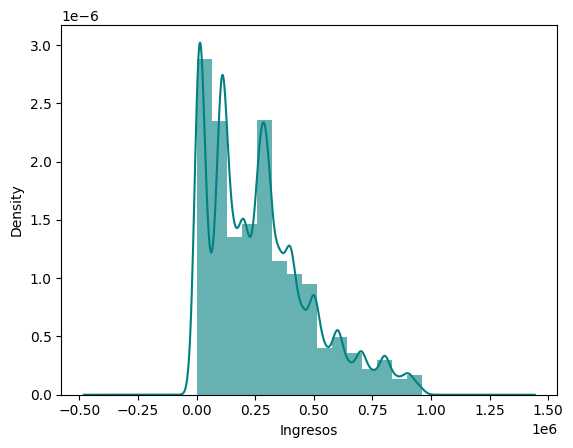

In [14]:
ax = df["ytot"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["ytot"].plot(kind='density', color='teal')
ax.set(xlabel='Ingresos')
plt.show()

###**Imputación de valores para Ytot**
* Como en el gráfico de distribución se aprecia que los datos están cargados hacia la izquierda y además tiene dos concentraciones de datos se utilizará la mediana en vez de la media.

In [15]:
df2 = df.copy()
df2['ytot'].fillna(df['ytot'].median(skipna = True),inplace = True)

##**Gráfico para comparar la distribución de datos con los valores imputados para ytot**

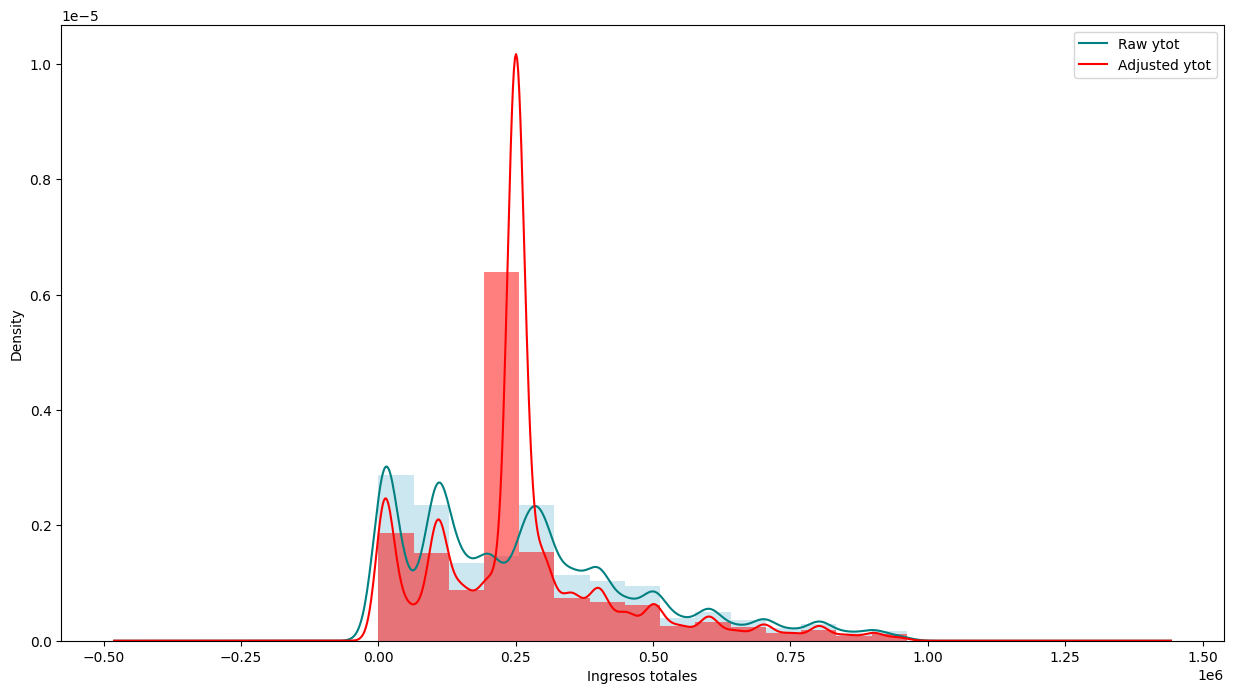

In [16]:
plt.figure(figsize=(15,8))
ax = df["ytot"].hist(bins=15, density=True, stacked=True, color='lightblue', alpha=0.6)
df["ytot"].plot(kind='density', color='teal')
ax = df2["ytot"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.5)
df2["ytot"].plot(kind='density', color='red')
ax.legend(['Raw ytot', 'Adjusted ytot'])
ax.set(xlabel='Ingresos totales')
plt.show()

##**Nulos de la variable o1**
* Como esta variable contiene solo 2 opciones que es estar o no empleado y los valores Nan se encuentran en blanco, lo correcto es eliminar estos valores ya que no se cuenta con esa información y utilizar la moda podría cargar más una de ellas

In [17]:
df2['o1'].unique()
df2.dropna(subset = ['o1'],inplace = True)

##**Nulos variable "oficio1"**
* Se reemplazo por la categoría "sin dato"

In [18]:
# df['oficio1'].unique()
df2.loc[df2.oficio1.isna(),'oficio1'] = 'Sin dato'

##**Nulos variable o16**
* Considerando que hay muchas personas que no respondieron la encuesta, las personas que se encuentran desempleadas o contienen empleos informales sin contrato de trabajo, se reemplazará los valores nulos por la categoría "No sabe/no responde"

In [19]:
df2.loc[df2.o16.isna(),'o16'] = 'No sabe/no responde'

##**Nulos esc**

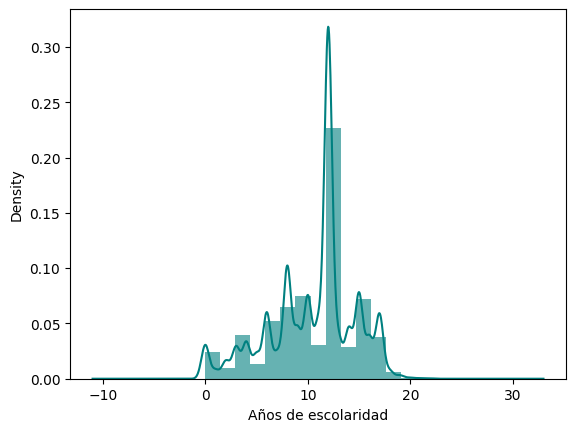

In [20]:
ax = df2['esc'].hist(bins = 15,density = True, stacked = True, color = 'teal',alpha = 0.6)
df2['esc'].plot(kind = 'density', color = 'teal')
ax.set_xlabel('Años de escolaridad')
plt.show()


In [21]:
promedio =df2['esc'].mean(skipna = True)
mediana = df2['esc'].median(skipna = True)
print(f"El promedio es de: {promedio}")
print(f"La mediana es de: {mediana}")  #

El promedio es de: 10.493638833232948
La mediana es de: 12.0


##**Imputación de valores nulos para esc**
* De acuerdo al gráfico y los valores de mediana y media, parece que los valores se encuentran un poco más a la derecha del centro, por lo que se utilizará la mediana.

In [22]:
df3 = df2.copy()
df3['esc'].fillna(df3['esc'].median(skipna = True),inplace = True)

In [23]:
promedio_antes = df2['esc'].mean()
promedio_despues = df3['esc'].mean()
print(f"Promedio antes: {promedio_antes}")
print(f"Promedio después: {promedio_despues}")

Promedio antes: 10.493638833232948
Promedio después: 10.502355593847959


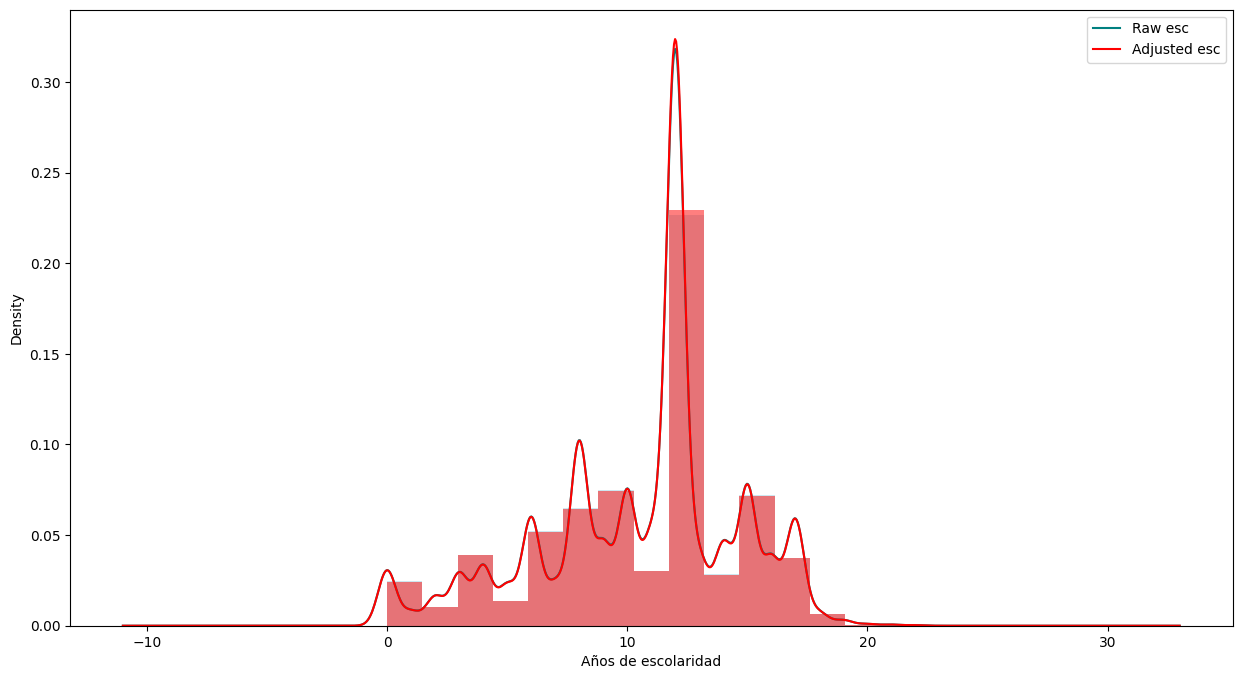

In [24]:
plt.figure(figsize = (15,8))
ax = df2['esc'].hist(bins = 15,density = True,stacked = True,color = 'lightblue',alpha = 0.6)
df2['esc'].plot(kind = 'density',color = 'teal')
ax = df3['esc'].hist(bins = 15,density = True,stacked = True,color = 'red',alpha = 0.5)
df3['esc'].plot(kind = 'density',color = 'red')
ax.legend(['Raw esc','Adjusted esc'])
ax.set_xlabel('Años de escolaridad')
plt.show()

##**Nulos variable objetivo pobreza**

* Considerando que esta variable contiene pocos datos no nulos y como es la variable objetivo, solo se eliminarán esos datos faltantes

In [25]:
# df3['pobreza'].value_counts()
df3.dropna(subset = ['pobreza'],inplace = True)

In [26]:
nulos = df3.isnull().sum()
nulos[nulos>0]

,0


#**Análisis exploratorio de datos**

In [27]:
df3.columns

Index(['sexo', 'edad', 'ecivil', 'esc', 'educ', 'activ', 'indmat', 'indsan',
       'calglobviv', 'hacinamiento', 's12', 'o16', 'o1', 'oficio1', 'ytot',
       'pobreza'],
      dtype='object')

##**Edad**

Se nota una diferencia en especial en la categoría de los no pobres con respecto de la variable objetivo

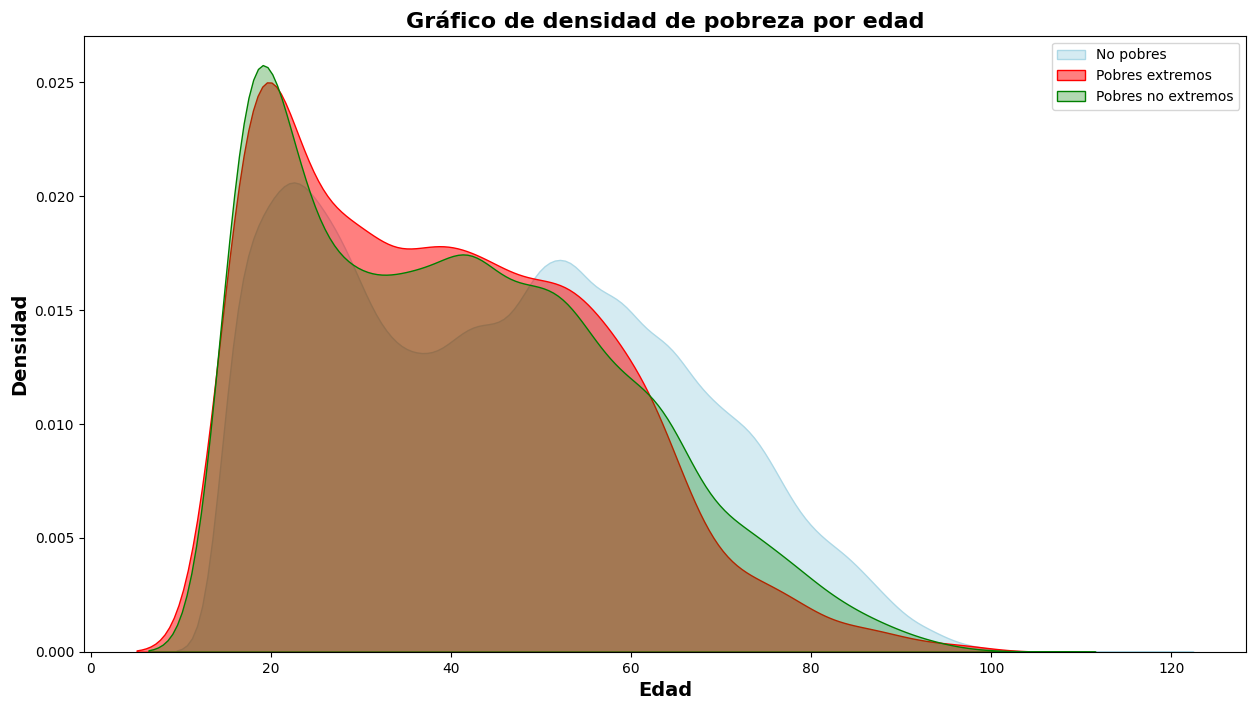

In [28]:
plt.figure(figsize = (15,8))
ax = sns.kdeplot(df3['edad'][df3.pobreza == 'No pobres'],color = 'lightblue',shade = True,alpha = 0.5)
sns.kdeplot(df3['edad'][df3.pobreza == 'Pobres extremos'],color = 'red',shade = True,alpha = 0.5)
sns.kdeplot(df3['edad'][df3.pobreza == 'Pobres no extremos'],color = 'green', shade = True,alpha = 0.3)
plt.legend(['No pobres','Pobres extremos','Pobres no extremos'])
plt.title("Gráfico de densidad de pobreza por edad",fontsize = 16,fontweight = 'bold')
ax.set_xlabel('Edad',fontsize = 14,fontweight = 'bold')
ax.set_ylabel("Densidad",fontsize = 14,fontweight = 'bold')
plt.show()

##**Escolaridad**

* Se aprecia que la categoría de no pobres tiene cierta relación con la cantidad de años de escolaridad, ya que aumenta mucho esta luego de los 10 años de escolaridad

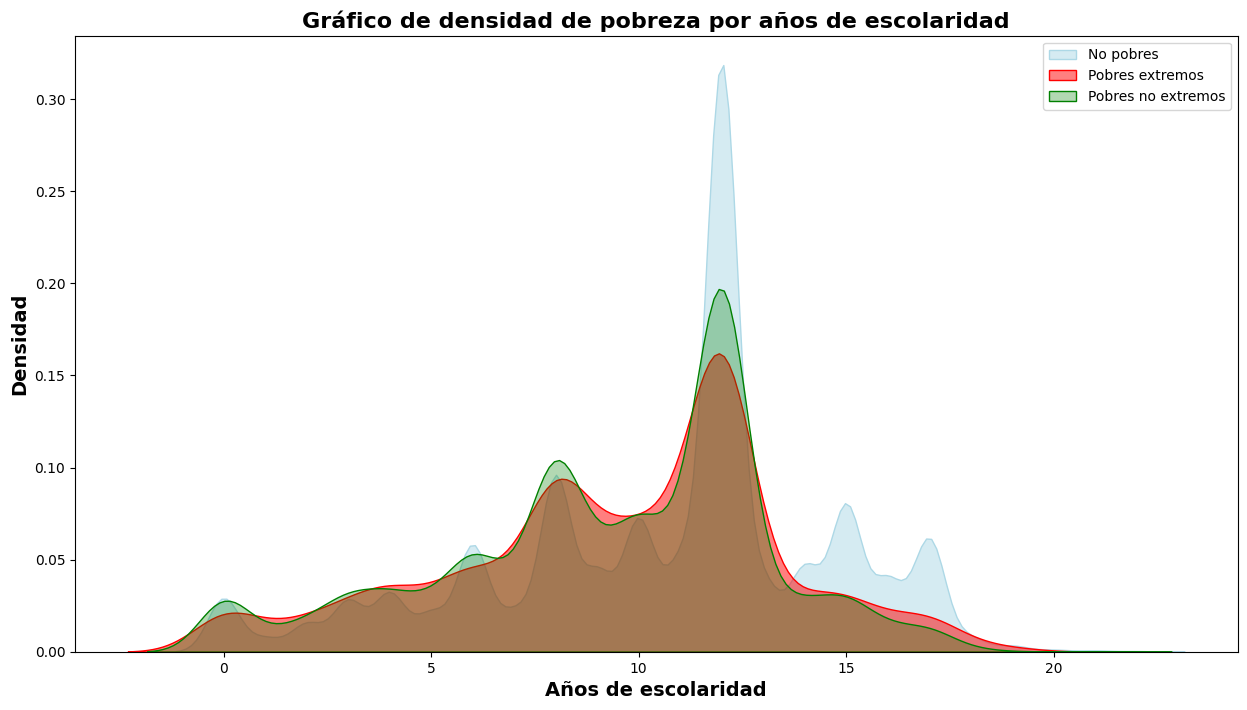

In [29]:
plt.figure(figsize = (15,8))
ax = sns.kdeplot(df3['esc'][df3.pobreza == 'No pobres'],color = 'lightblue',shade = True,alpha = 0.5)
sns.kdeplot(df3['esc'][df3.pobreza == 'Pobres extremos'],color = 'red',shade = True,alpha = 0.5)
sns.kdeplot(df3['esc'][df3.pobreza == 'Pobres no extremos'],color = 'green', shade = True,alpha = 0.3)
plt.legend(['No pobres','Pobres extremos','Pobres no extremos'])
plt.title("Gráfico de densidad de pobreza por años de escolaridad",fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Años de escolaridad',fontsize = 14,fontweight = 'bold')
ax.set_ylabel('Densidad',fontsize = 14,fontweight = 'bold')
plt.show()

##**Ingreso total**
* Se aprecia una diferencia como era de esperar para la categoría de no pobres en cuanto aumentan los ingresos

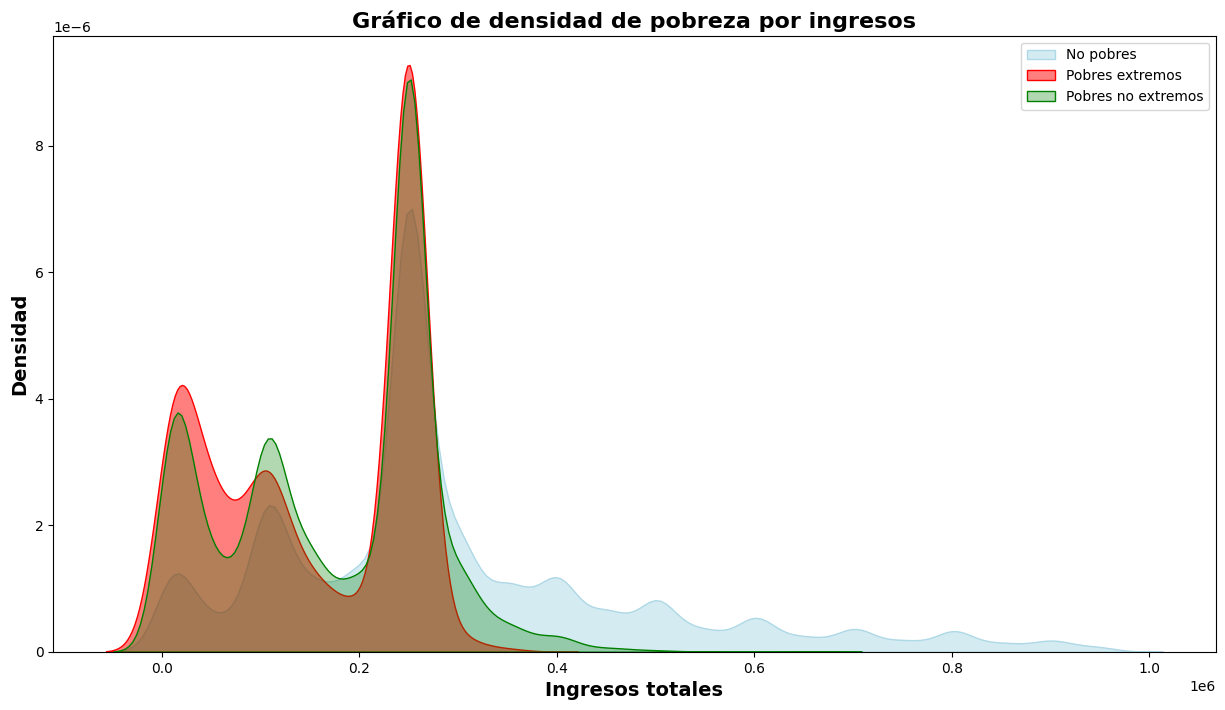

In [30]:
plt.figure(figsize = (15,8))
ax = sns.kdeplot(df3['ytot'][df3.pobreza == 'No pobres'],color = 'lightblue',shade = True,alpha = 0.5)
sns.kdeplot(df3['ytot'][df3.pobreza == 'Pobres extremos'],color = 'red',shade = True,alpha = 0.5)
sns.kdeplot(df3['ytot'][df3.pobreza == 'Pobres no extremos'],color = 'green', shade = True,alpha = 0.3)
plt.legend(['No pobres','Pobres extremos','Pobres no extremos'])
plt.title("Gráfico de densidad de pobreza por ingresos",fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Ingresos totales',fontsize = 14,fontweight = 'bold')
ax.set_ylabel('Densidad',fontsize = 14,fontweight = 'bold')
plt.show()

##**Heathmap de variables numéricas**

* Este heatmap se utiliza para saber si existe independencia entre las variables

<Axes: >

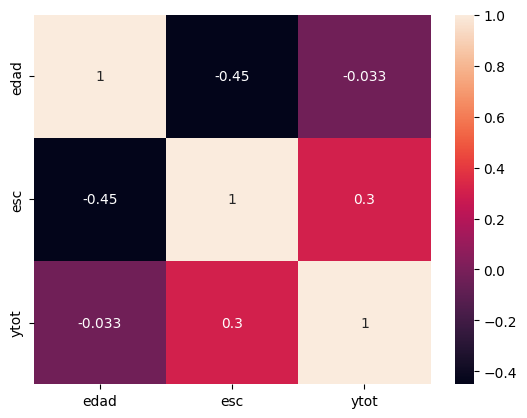

In [31]:
sns.heatmap(df3.select_dtypes('number').corr(), annot = True)

##**Variables categóricas**
* La única variable que casi no representa mayores diferencias es o1

In [32]:
df3.select_dtypes('object').columns

Index(['sexo', 'ecivil', 'educ', 'activ', 'indmat', 'indsan', 'calglobviv',
       'hacinamiento', 's12', 'o16', 'o1', 'oficio1', 'pobreza'],
      dtype='object')

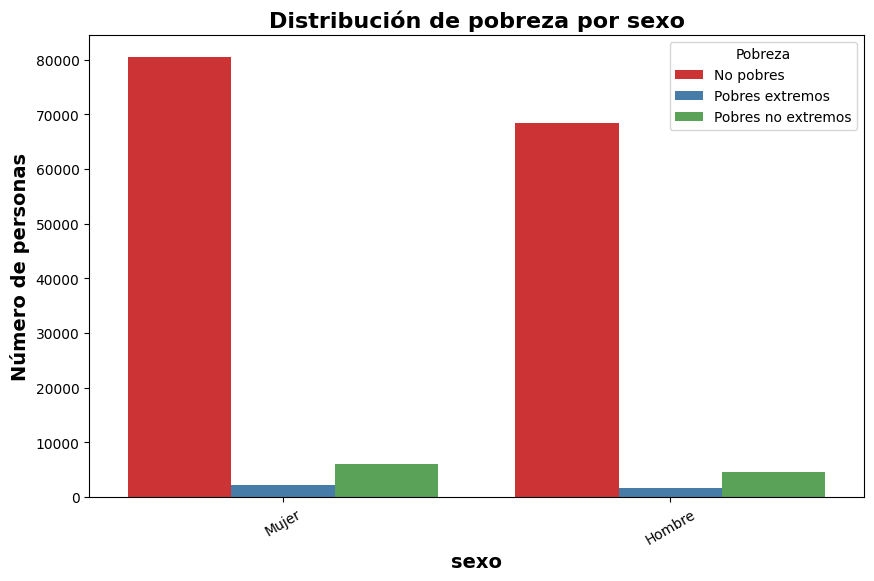

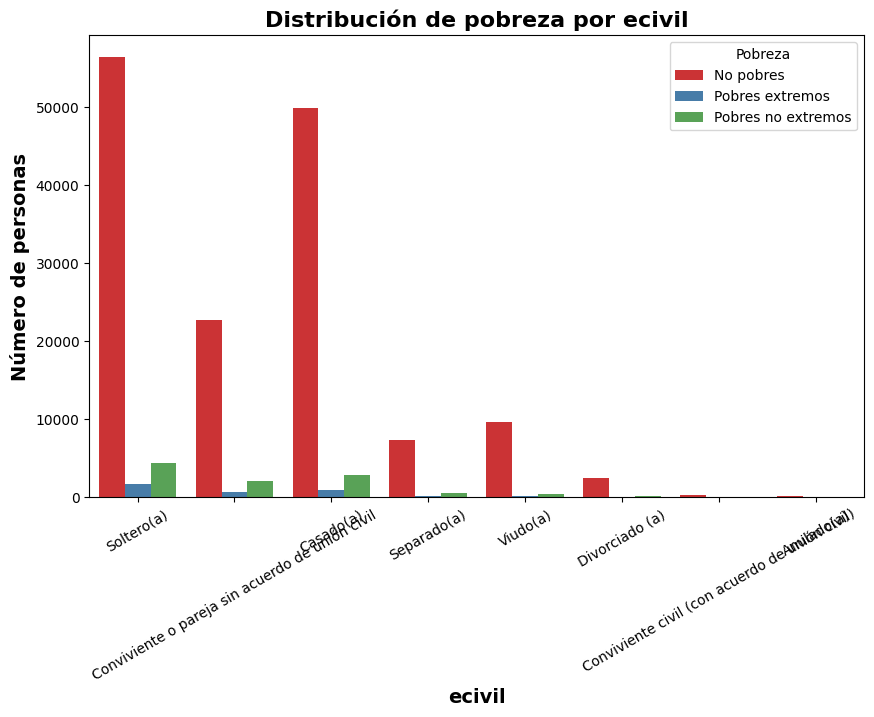

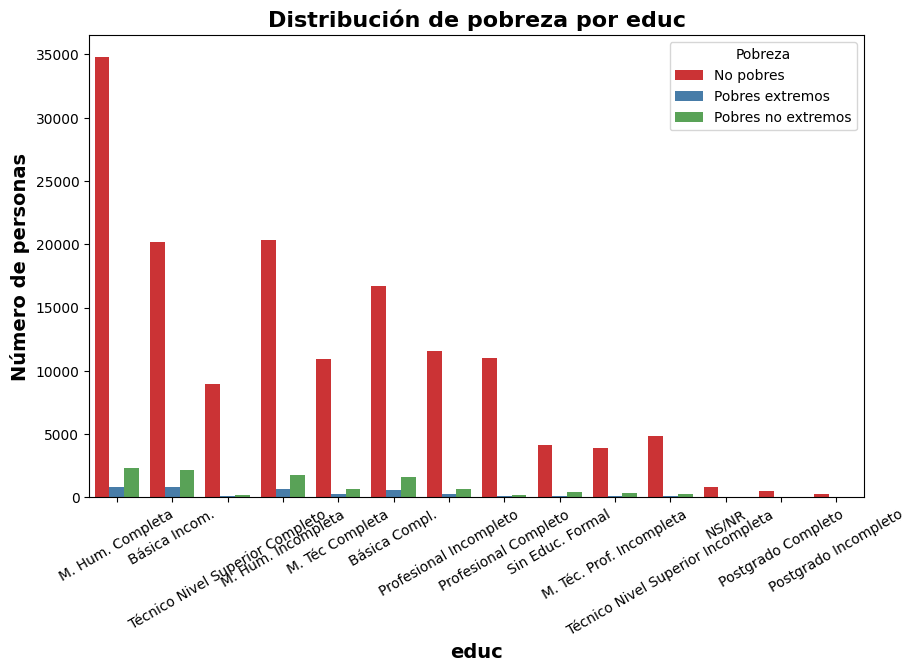

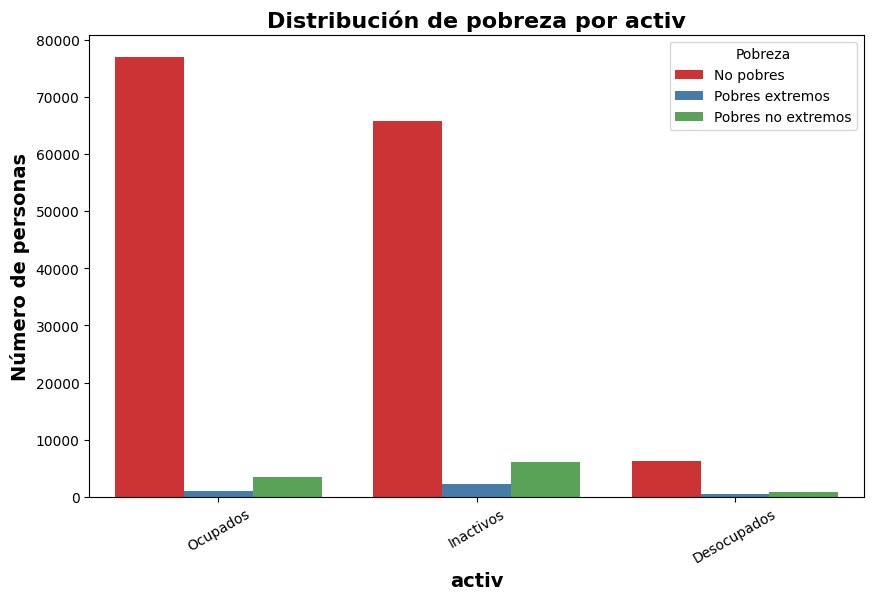

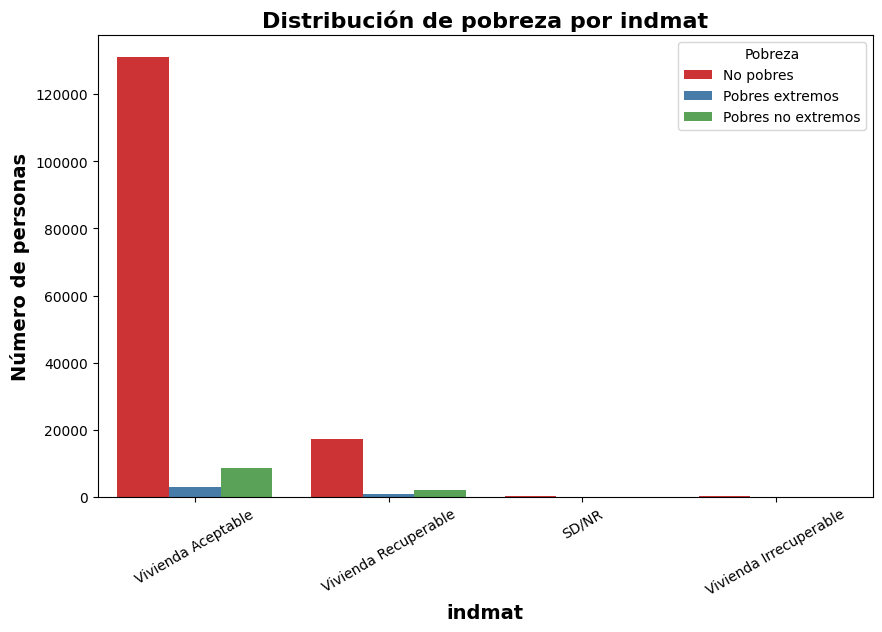

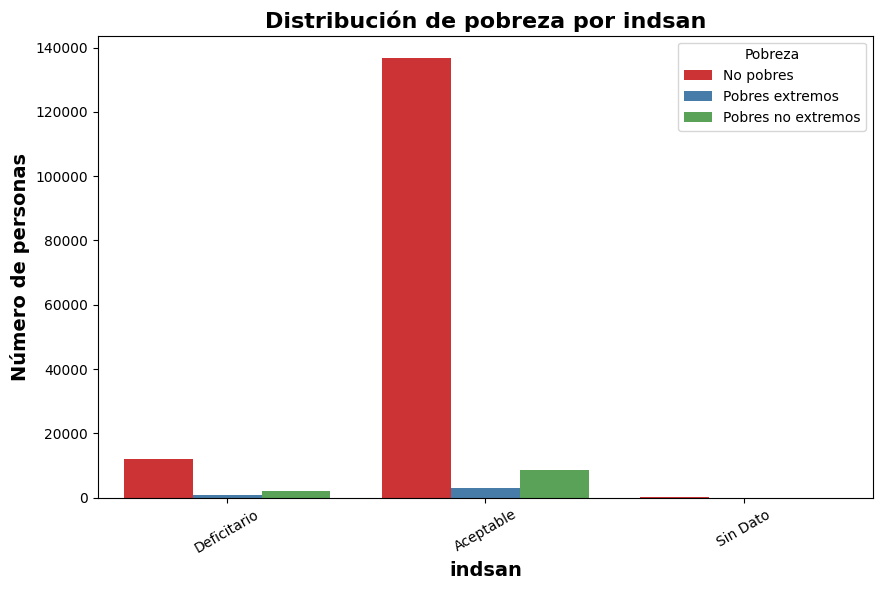

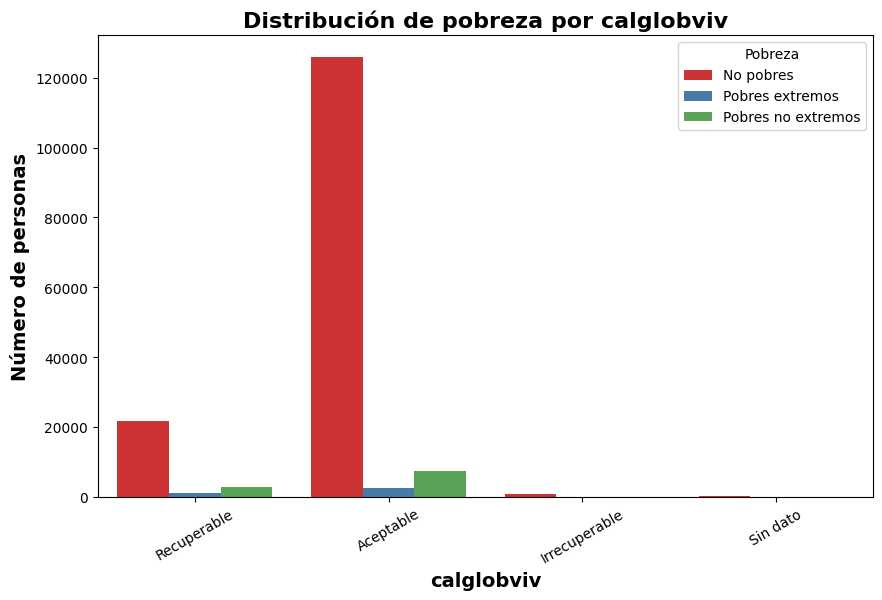

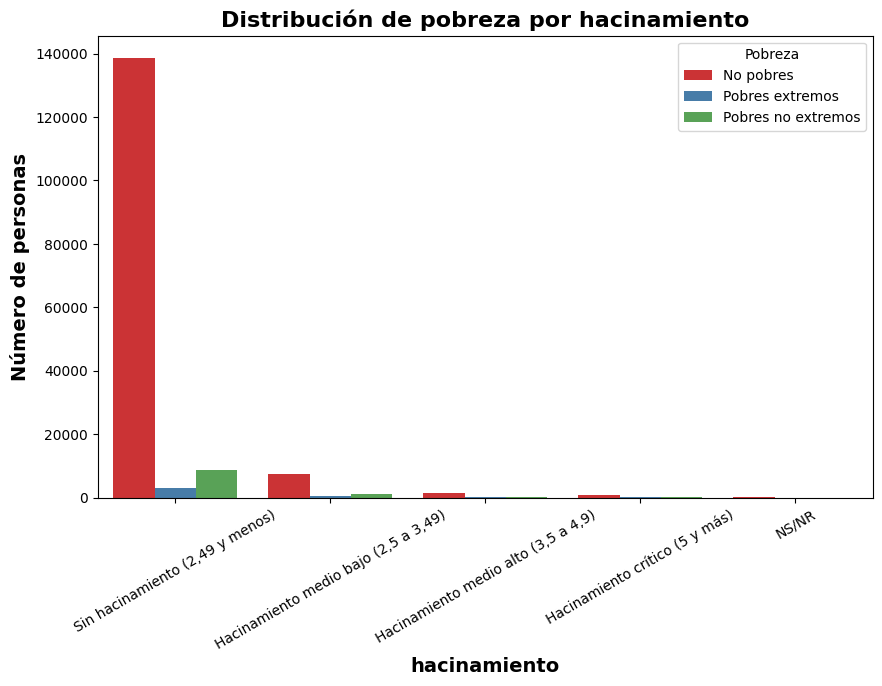

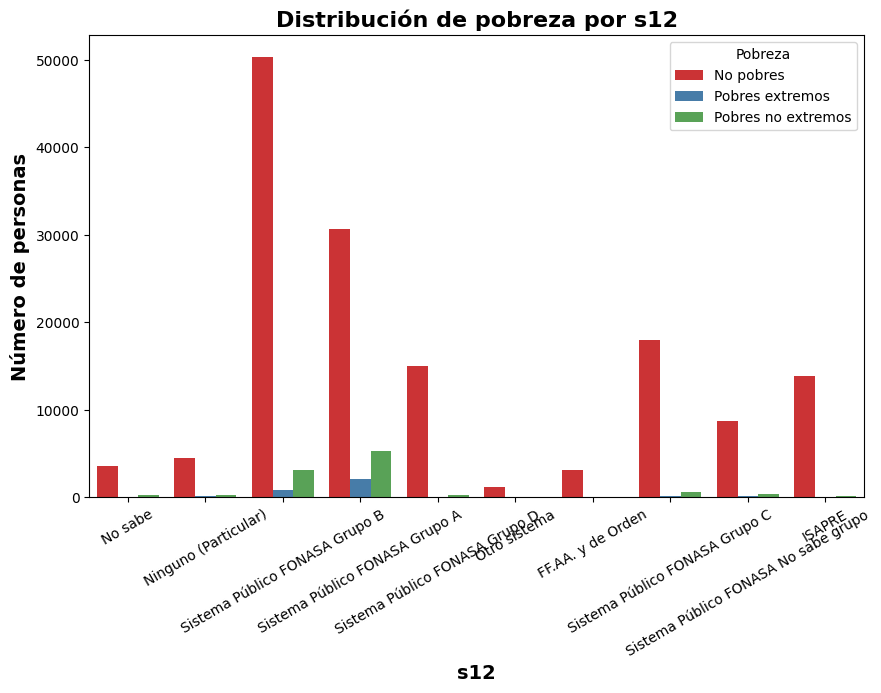

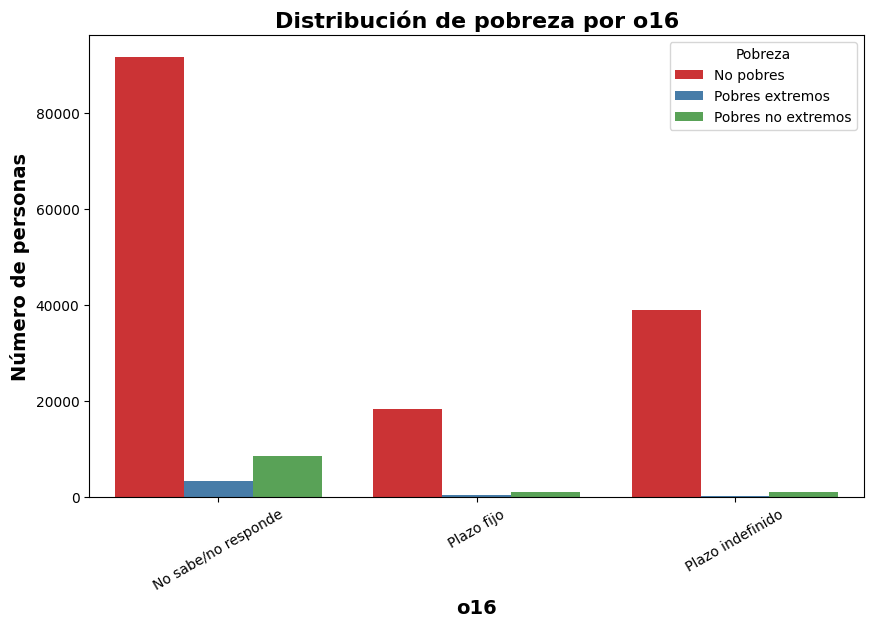

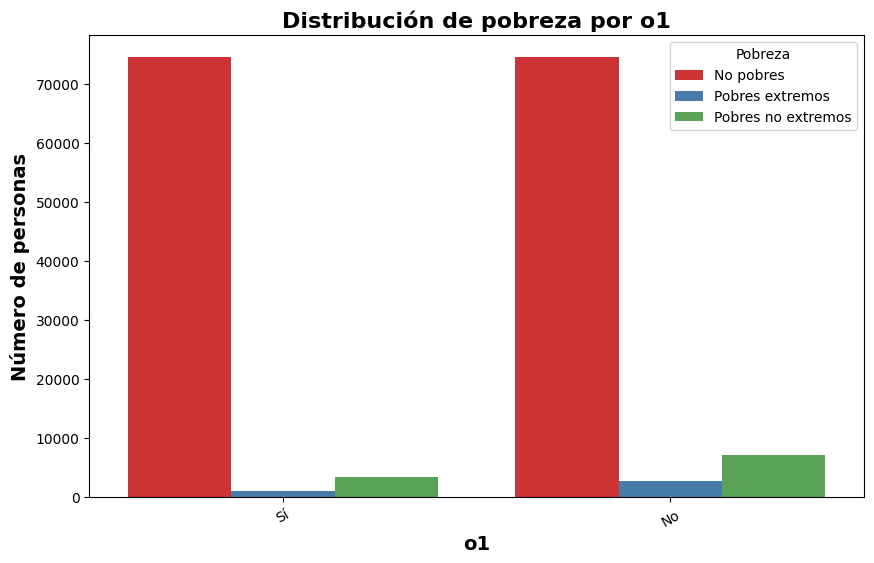

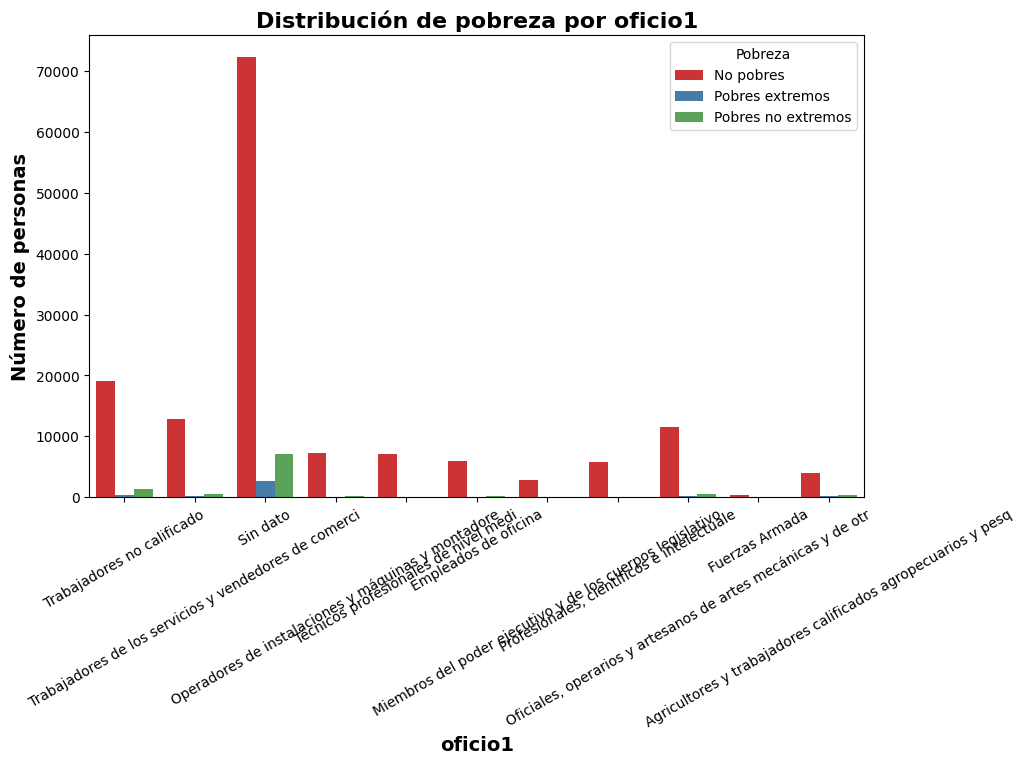

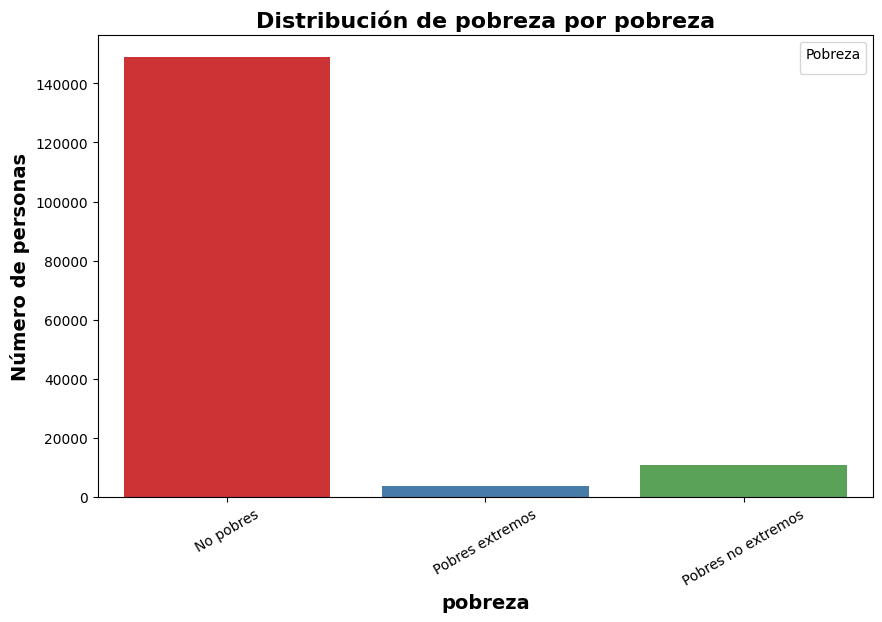

In [33]:
# df3.select_dtypes('object').columns
object = df3.select_dtypes('object').columns
for categoricas in object:
  plt.figure(figsize= (10,6))
  sns.countplot(df3,x= categoricas,hue = 'pobreza',palette = 'Set1')
  plt.title(f'Distribución de pobreza por {categoricas}',fontsize = 16,fontweight = 'bold')
  plt.xlabel(f'{categoricas}',fontsize = 14,fontweight = 'bold')
  plt.ylabel('Número de personas',fontsize = 14,fontweight = 'bold')
  plt.xticks(rotation = 30)
  plt.legend(title = 'Pobreza')

plt.show()

In [34]:
df3.groupby(['o1','pobreza'])['o1'].count()

o1  pobreza           
No  No pobres             74475
    Pobres extremos        2795
    Pobres no extremos     7221
Sí  No pobres             74518
    Pobres extremos        1034
    Pobres no extremos     3409
Name: o1, dtype: int64

#**Explicar la selección de variables aquí**

#**Regresión logística**

#**Obtención de dummies**

In [35]:
data = df3.drop(columns = ['pobreza'])
categorical_col = data.select_dtypes('object').columns.tolist()
data_logistic = pd.get_dummies(data, columns = categorical_col,drop_first = True)
data_logistic['pobreza'] = df3['pobreza']

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, log_loss

X = data_logistic.drop(columns = ['pobreza'])
y = data_logistic['pobreza']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =10)

#**Balanceo utilizando over sampling Smote**

In [37]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
smote = SMOTE(random_state = 10)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
print(sorted(Counter(y_train_smote).items()))

[('No pobres', 119236), ('Pobres extremos', 119236), ('Pobres no extremos', 119236)]


##**Regresión logística normal**
* Entrega valores bajos de recall para los pobres no extremos

In [38]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_smote,y_train_smote)
y_pred_smote = logistic_regression.predict(X_test)
print(classification_report(y_test,y_pred_smote))

                    precision    recall  f1-score   support

         No pobres       0.93      0.68      0.79     29757
   Pobres extremos       0.05      0.50      0.09       779
Pobres no extremos       0.08      0.11      0.09      2155

          accuracy                           0.64     32691
         macro avg       0.35      0.43      0.32     32691
      weighted avg       0.86      0.64      0.73     32691



##**Regresión logística con validación cruzada**

* Es un mal modelo, presenta un accuracy inferior al 50%

In [39]:
scores_accuracy_log = cross_val_score(logistic_regression,X_train_smote,y_train_smote,cv = 10,scoring = 'accuracy')
scores_log_loss = cross_val_score(logistic_regression,X_train_smote,y_train_smote,cv = 10,scoring = 'neg_log_loss')
print('K-fold cross validation results:')
print(logistic_regression.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy_log.mean())
print(logistic_regression.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())

K-fold cross validation results:
LogisticRegression average accuracy is 0.425
LogisticRegression average log_loss is 1.028


##**Balanceo utilizando Under sampling Near miss**

* Mal modelo accuracy muy bajo

In [40]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
nearmiss = NearMiss(version = 3)
X_train_nearmiss,y_train_nearmiss = nearmiss.fit_resample(X_train,y_train)
print(sorted(Counter(y_train_nearmiss).items()))

[('No pobres', 3050), ('Pobres extremos', 3050), ('Pobres no extremos', 3050)]


In [41]:
scores_accuracy_log2 = cross_val_score(logistic_regression,X_train_nearmiss,y_train_nearmiss,cv = 10,scoring = 'accuracy')
scores_log_loss2 = cross_val_score(logistic_regression,X_train_nearmiss,y_train_nearmiss,cv = 10,scoring = 'neg_log_loss')
print('K-fold cross validation results:')
print(logistic_regression.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy_log2.mean())
print(logistic_regression.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss2.mean())

K-fold cross validation results:
LogisticRegression average accuracy is 0.432
LogisticRegression average log_loss is 1.057


#**Naive Bayes**

In [42]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train_smote,y_train_smote)
predictions_nb = nb_clf.predict(X_test)

#**Métricas Naive Bayes**

In [43]:
report_nb = classification_report(y_test, predictions_nb, target_names=["No pobres", "Pobres extremos", "Pobres no extremos"])
print(report_nb)

                    precision    recall  f1-score   support

         No pobres       0.94      0.65      0.77     29757
   Pobres extremos       0.04      0.51      0.08       779
Pobres no extremos       0.08      0.12      0.10      2155

          accuracy                           0.61     32691
         macro avg       0.35      0.43      0.31     32691
      weighted avg       0.86      0.61      0.71     32691



In [44]:
df3.pobreza.unique()

array(['No pobres', 'Pobres extremos', 'Pobres no extremos'], dtype=object)

In [45]:
scores_accuracy_bayes = cross_val_score(nb_clf,X_train_smote,y_train_smote,cv = 10, scoring = 'accuracy')
print(nb_clf.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy_bayes.mean())

MultinomialNB average accuracy is 0.428


#**Decision Tree**

In [48]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_nearmiss,y_train_nearmiss)

DecisionTreeClassifier(random_state=0)

#**Métricas Decision Tree**

In [53]:
predictions_tree = tree.predict(X_test)
report_tree = classification_report(y_test,predictions_tree, target_names = ['No pobres','Pobres extremos','Pobres no extremos'])
print(report_tree)

                    precision    recall  f1-score   support

         No pobres       0.95      0.37      0.53     29757
   Pobres extremos       0.04      0.52      0.07       779
Pobres no extremos       0.07      0.33      0.12      2155

          accuracy                           0.37     32691
         macro avg       0.35      0.40      0.24     32691
      weighted avg       0.87      0.37      0.49     32691



##**Decision tree con cross validation**

In [52]:
scores_accuracy_tree = cross_val_score(tree,X_train_smote,y_train_smote,cv = 10, scoring = 'accuracy')
print(nb_clf.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy_bayes.mean())

MultinomialNB average accuracy is 0.428
